# Zomato Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Zomatodata.csv')

In [3]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [16]:
def convert_rate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
df['rate']=df['rate'].apply(convert_rate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [8]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# Exploratory Data Analysis

## 1.Count of votes by restaurants

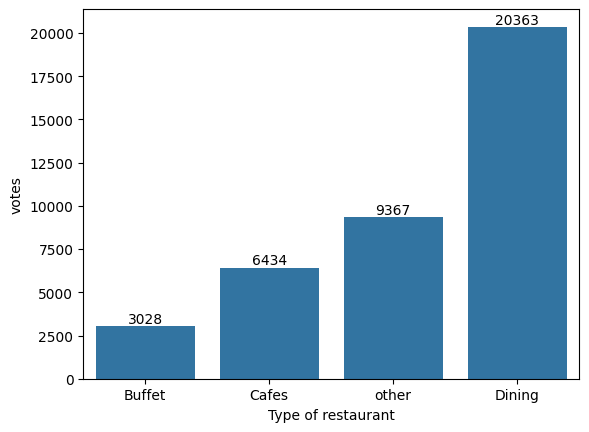

In [17]:
type=df.groupby(['listed_in(type)'],as_index=False)['votes'].sum().sort_values(by='votes')
ax=sns.barplot(x='listed_in(type)',y='votes',data=type)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Type of restaurant')
plt.show()

*From the above graph we can say that the Dining type of restaurants has recieved the maximum number of votes from the customers*

## 2.Count of orders by restaurant type

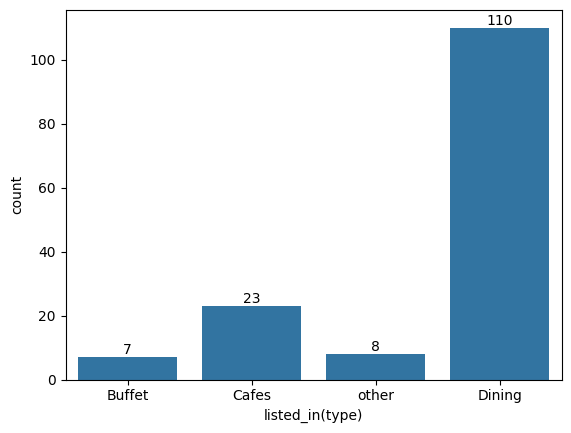

In [13]:
ax=sns.countplot(x='listed_in(type)',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

*From the above graph we can conclude that the Dining and the cafes are the two major types where most of the customers order from*

## 3.Rating distribution by number of restaurants

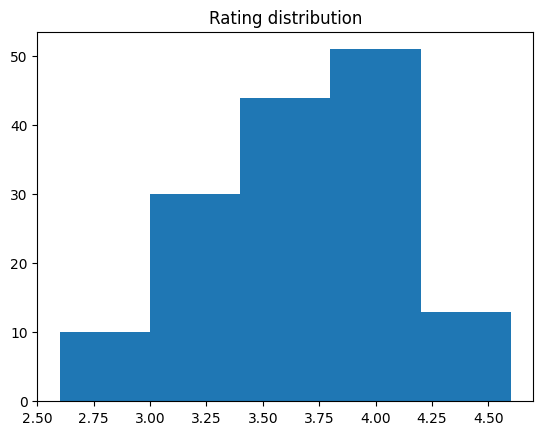

In [19]:
plt.hist(df['rate'],bins=5)
plt.title('Rating distribution')
plt.show()

*Majority of restaurants are getting ratings ranging from 3.5 to 4*

In [20]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## Data for online order

In [23]:
mask=df['online_order']=='Yes'
online_order=df[mask]
online_order

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes
10,Village Café,Yes,No,4.1,402,500,Cafes
11,Cafe Shuffle,Yes,Yes,4.2,150,600,Cafes
12,The Coffee Shack,Yes,Yes,4.2,164,500,Cafes


## Count of average cost for two people in online mode

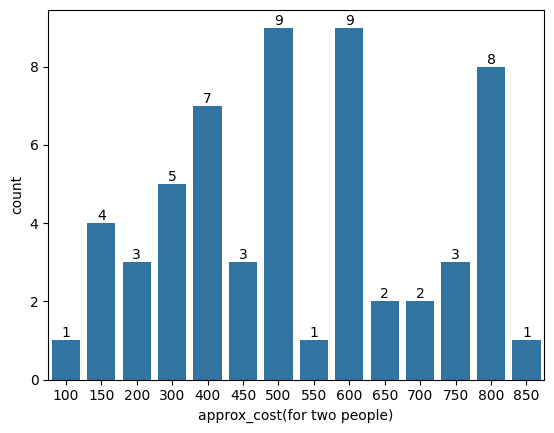

In [24]:
ax=sns.countplot(x='approx_cost(for two people)',data=online_order)
for bars in ax.containers:
    ax.bar_label(bars)

*The majority of customers prefer online orders with approximate cost of 600 and 500 followed by 800*

In [25]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## Rating received by mode of order(Online/offline)

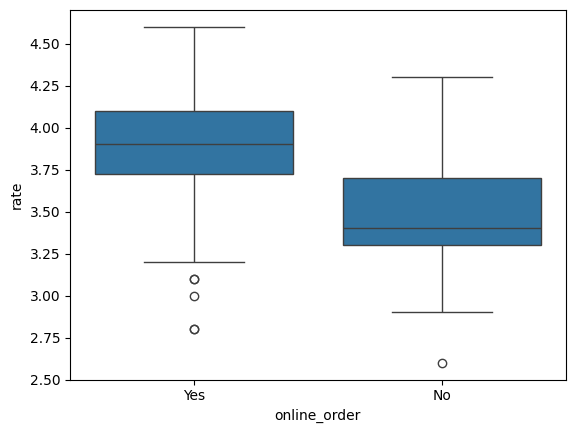

In [33]:
sns.boxplot(x='online_order',y='rate',data=df)
plt.show()

*From the above graph,it is clear that the ratings of the online mode(3.75-4.25) is higher than that of the offline mode(3.25-3.75)*

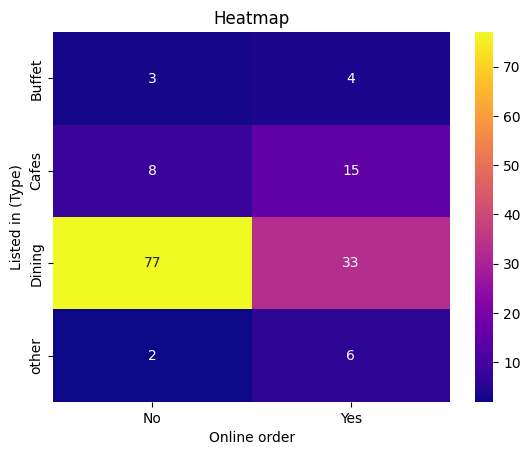

In [35]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True,cmap='plasma',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online order')
plt.ylabel('Listed in (Type)')
plt.show()

*From the above heatap it is clear that Dining restaurants primarily accept offline orders whereas cafes primarily recieve online orders.This suggests that clients prefer orders in restaurant but prefers online orders in cafes*